In [ ]:
#!pip install spacy.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/DarcyZeng1/HouseData/main/Bangalore.csv'

In [ ]:
df = pd.read_csv(url)

df.head()

print("Before cleaning", len(df))


Before cleaning 6207


**Part A. Data summarization, data preprocessing and feature selections:**

1. An initial step of any data mining project involves exploring and summarizing the data to get a “feel” of the data. To this end, your team should conduct data summarization using techniques such as scatter plots, boxplots, and histograms to visualize and to explore attribute characteristics.

**Distribution of Property Prices**

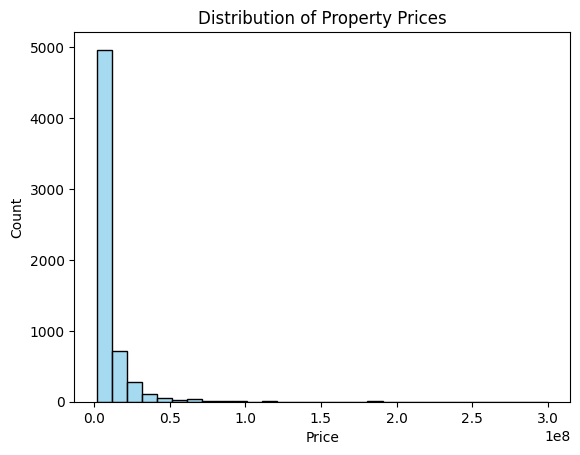

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for the distribution of property prices
sns.histplot(df['Price'], bins=30, color='skyblue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

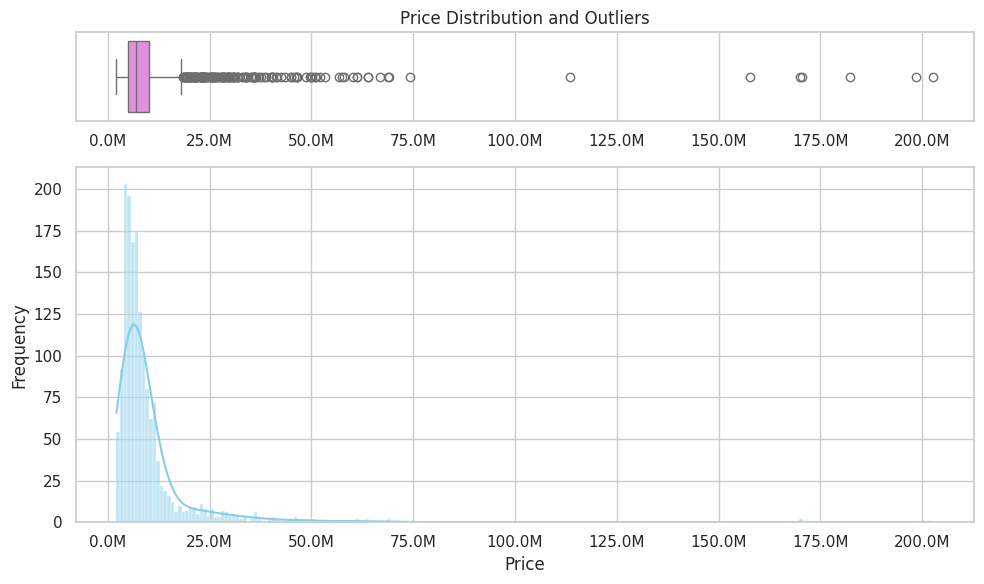

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

def plot_price_distribution(df):
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [0.2, 0.8]})

    # Formatter for millions
    millions_formatter = mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')

    # Boxplot - for outliers
    sns.boxplot(x=df['Price'], ax=axs[0], color="violet")
    axs[0].set(xlabel='')
    # Applying currency formatting to the boxplot x-axis
    axs[0].xaxis.set_major_formatter(millions_formatter)

    # Histogram - for distribution
    sns.histplot(data=df, x='Price', ax=axs[1], kde=True, color="skyblue")
    # Applying currency formatting to the histogram x-axis
    axs[1].xaxis.set_major_formatter(millions_formatter)

    # Set titles and labels
    axs[0].set_title('Price Distribution and Outliers')
    axs[1].set_xlabel('Price')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_price_distribution(df)

**Property Area vs. Price**

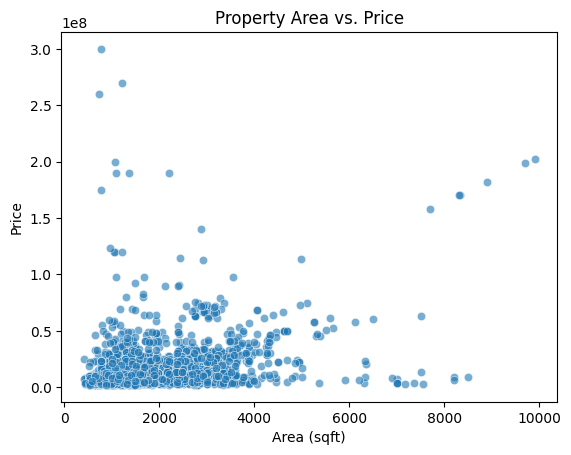

In [ ]:
# Visualization for property area vs. price
sns.scatterplot(x='Area', y='Price', data=df, alpha=0.6)
plt.title('Property Area vs. Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.show()

**Distribution of Number of Bedrooms**

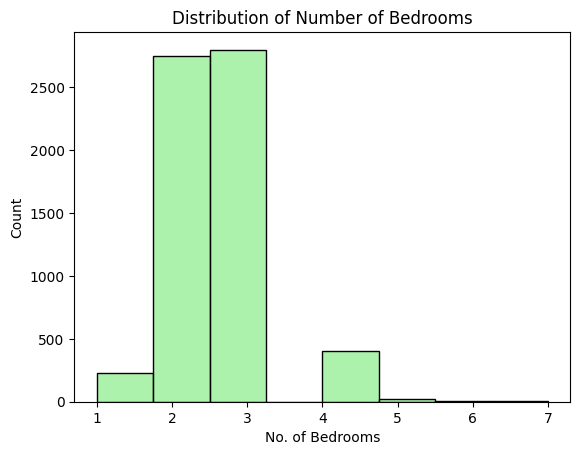

In [ ]:
# Visualization for the distribution of the number of bedrooms
sns.histplot(df['No. of Bedrooms'], bins=8, color='lightgreen')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Count')
plt.show()


**Resale Properties**

<ipython-input-7-0a3cd922c6bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Resale', data=df, palette='Set2')


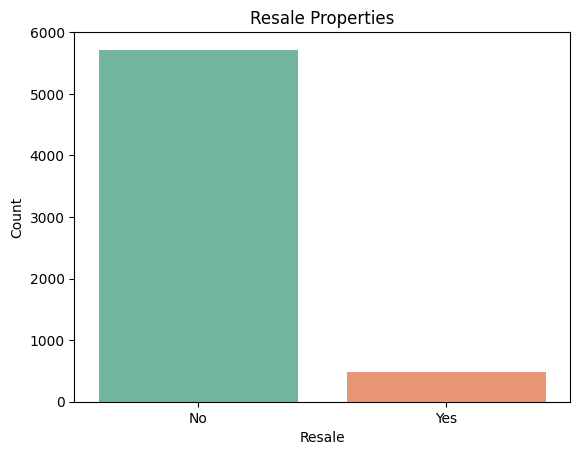

In [ ]:
# Visualization for resale properties
sns.countplot(x='Resale', data=df, palette='Set2')
plt.title('Resale Properties')
plt.xlabel('Resale')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


**Dataset Row Categorization**

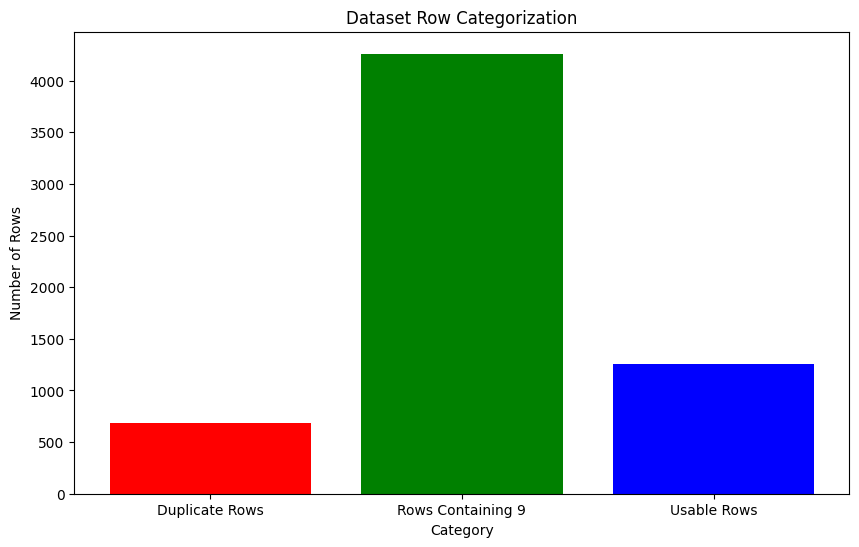

In [ ]:
# Find duplicate rows
duplicate_rows = df.duplicated().sum()

# Function to check if a cell contains exactly 9
def contains_exactly_9(x):
    if isinstance(x, int) or isinstance(x, float):
        return x == 9
    elif isinstance(x, str):
        return '9' in x.split()
    return False

# Apply the function across the DataFrame to identify rows to drop
rows_with_9 = df.applymap(contains_exactly_9).any(axis=1).sum()

# Calculate usable rows
total_rows = len(df)
usable_rows = total_rows - duplicate_rows - rows_with_9

# Data for plotting
categories = ['Duplicate Rows', 'Rows Containing 9', 'Usable Rows']
counts = [duplicate_rows, rows_with_9, usable_rows]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['red', 'green', 'blue'])
plt.title('Dataset Row Categorization')
plt.xlabel('Category')
plt.ylabel('Number of Rows')
plt.show()

2. In addition, data pre-processing involves data transformation, including:
- Handling missing values through e.g., imputation. (If not handled in the previous
phase).
- Handling categorical attributes through e.g., one-hot encoding or conversion to
ordinal data,
- Normalization of numeric attributes to ensure all attributes are of equal
importance during learning, and
- Feature selection to remove potentially redundant attributes

In [ ]:
print("Before cleaning", len(df))

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_rows = df.duplicated().sum()

# Data types
data_types = df.dtypes

print("Missing Values:\n", missing_values)
print("\nNumber of Duplicate Rows:", duplicate_rows)
# print("\nData Types:\n", data_types)


Before cleaning 1946
Missing Values:
 Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe    

**Removing Duplicates**

In [ ]:
# # Remove duplicates
df = df.drop_duplicates()

# Verify the removal of duplicates by checking the new shape of the dataframe
print("Shape of the DataFrame after removing duplicates:", df.shape)



Shape of the DataFrame after removing duplicates: (1612, 40)


According to the information about the data, "Since for a set of houses, nothing was mentioned about certain amenities, '9' was used to mark such values, which could indicate the absence of information about the apartment but these values don't ascertain the absence of such a feature in real life."

Therefore the rows that contains 9 are dropped because it cannot be used even we take the average.

In [ ]:
# Display the number of rows before dropping
print(f'Number of rows before dropping: {len(df)}')

# Drop rows containing the specific value 9
def contains_exactly_9(x):
    if isinstance(x, int) or isinstance(x, float):
        return x == 9
    elif isinstance(x, str):
        # Split the string by spaces and check if '9' is an exact match in any part
        return '9' in x.split()
    return False

# Apply the function across the DataFrame and drop rows where any cell returns True
rows_to_drop = df.applymap(contains_exactly_9).any(axis=1)
df = df[~rows_to_drop]

# Display the number of rows after dropping
print(f'Number of rows after dropping: {len(df)}')

# Display the first few rows of the filtered DataFrame to verify
#print(df_filtered.head())


Number of rows before dropping: 6207
Number of rows after dropping: 1946


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


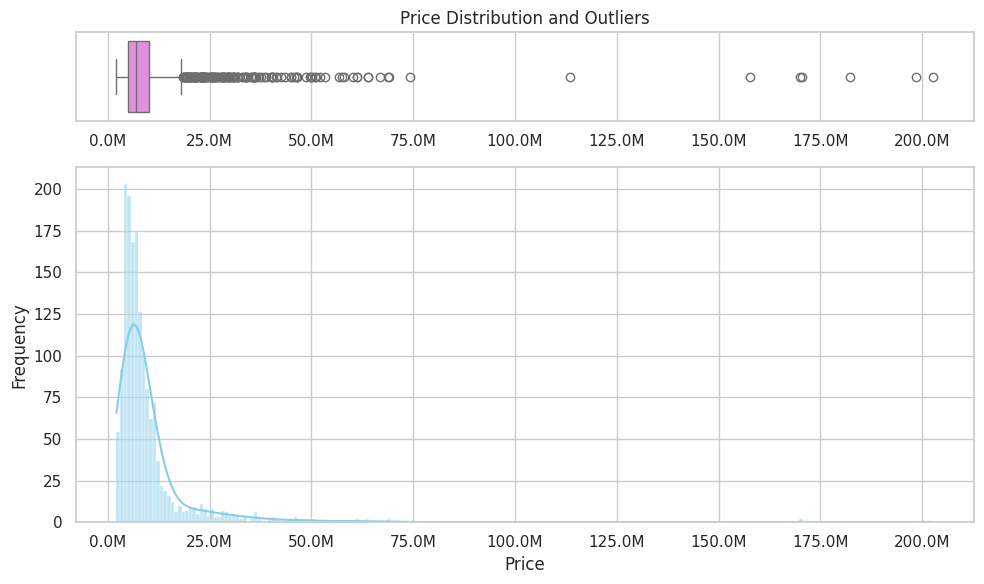

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

def plot_price_distribution(df):
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [0.2, 0.8]})

    # Formatter for millions
    millions_formatter = mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')

    # Boxplot - for outliers
    sns.boxplot(x=df['Price'], ax=axs[0], color="violet")
    axs[0].set(xlabel='')
    # Applying currency formatting to the boxplot x-axis
    axs[0].xaxis.set_major_formatter(millions_formatter)

    # Histogram - for distribution
    sns.histplot(data=df, x='Price', ax=axs[1], kde=True, color="skyblue")
    # Applying currency formatting to the histogram x-axis
    axs[1].xaxis.set_major_formatter(millions_formatter)

    # Set titles and labels
    axs[0].set_title('Price Distribution and Outliers')
    axs[1].set_xlabel('Price')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_price_distribution(df)

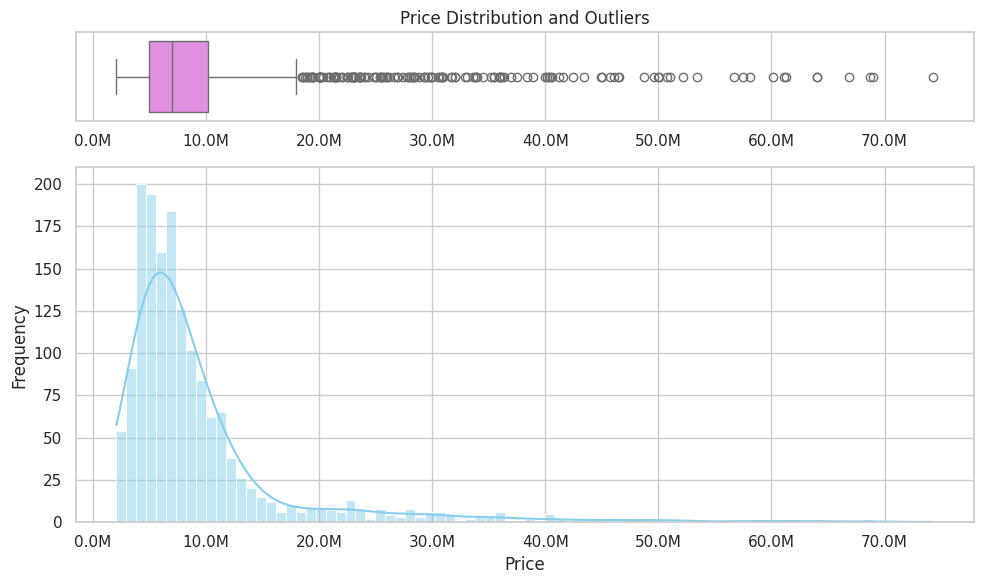

In [ ]:
# Remove rows where the 'Price' is above 75 million
df = df[df['Price'] <= 75000000]
plot_price_distribution(df)

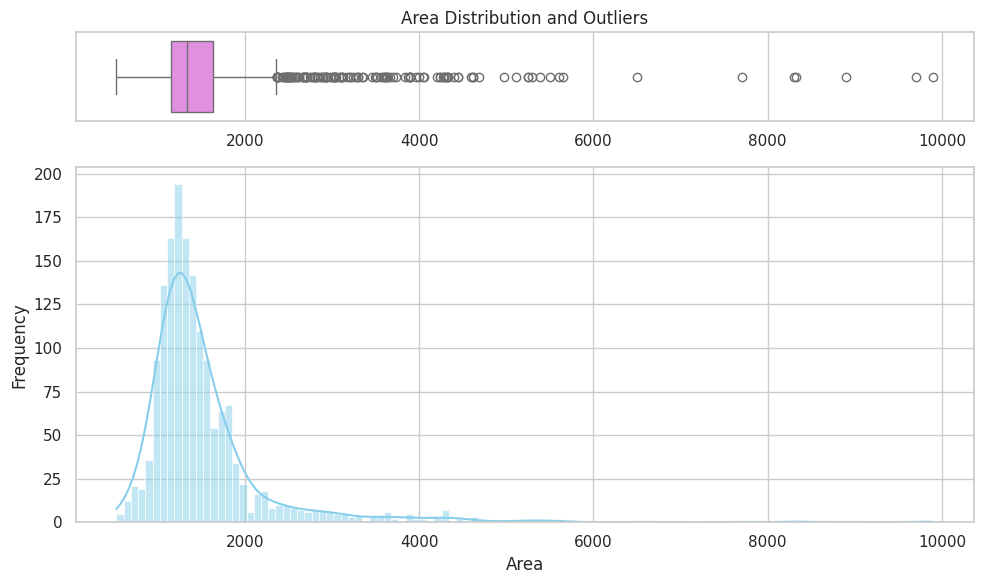

In [ ]:
def plot_area_distribution(df):
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [0.2, 0.8]})

    # Boxplot - for outliers
    sns.boxplot(x=df['Area'], ax=axs[0], color="violet")
    axs[0].set(xlabel='')

    # Histogram - for distribution
    sns.histplot(data=df, x='Area', ax=axs[1], kde=True, color="skyblue")

    # Set titles and labels
    axs[0].set_title('Area Distribution and Outliers')
    axs[1].set_xlabel('Area')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_area_distribution(df)

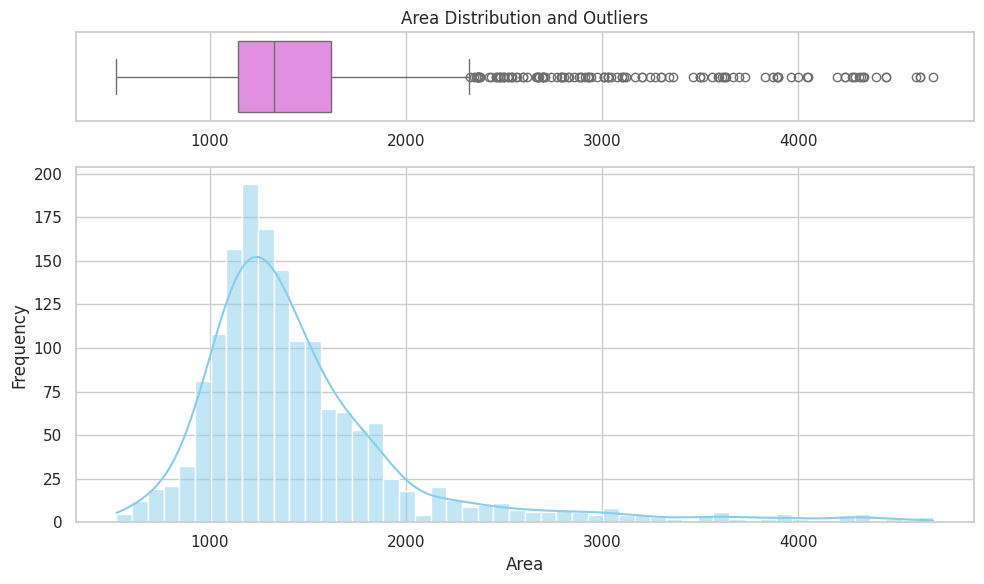

In [ ]:
# Remove rows where the 'Area' is above 5000
df = df[df['Area'] <= 5000]
plot_area_distribution(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Data cleaning was already demonstrated earlier, so we'll move to scaling
# Normalizing the 'Area' and 'Price' columns as an example
# scaler = MinMaxScaler()
# df[['Area', 'Price']] = scaler.fit_transform(df[['Area', 'Price']])

# Data Discretization: Converting 'Area' into discrete bins
df['Area Category'] = pd.cut(df['Area'], bins=3, labels=['Small', 'Medium', 'Large'])

# Feature Engineering: Creating a new feature, e.g., Price per square ft
df['Price per Square ft'] = df['Price'] / df['Area']

# Aggregating data: Creating an average price per area category
average_price_per_area_category = df.groupby('Area Category')['Price'].mean().reset_index()

#print(df['Price per Square ft'])

print(len(df))


1596


**From here is part C of phase 4**

In [ ]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Area Category,Price per Square ft
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Large,8982.035928
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,Small,7548.325359
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Small,4127.226463
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Small,4989.850746
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Small,4098.802395


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


# Identify categorical and numerical features
categorical_features = ['Location', 'Area Category']
numerical_features = [col for col in df.columns if col not in categorical_features]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(df)

**Using the one-class SVM algorithm to identify global outliers in the data.**

In [ ]:
# Initialize the One-Class SVM model
model = OneClassSVM(nu=0.05, kernel="rbf", gamma='auto')

# Fit the model on the processed data
model.fit(X_processed)

# Predict outliers
outliers = model.predict(X_processed)

# Add prediction results to the original DataFrame for review
df['Outlier'] = outliers

#Uncomment to print all the rows
#pd.set_option('display.max_rows', None)

# View the DataFrame with the outlier column
print(df[['Location', 'Outlier']])


                             Location  Outlier
0                    JP Nagar Phase 1        1
1          Dasarahalli on Tumkur Road        1
2     Kannur on Thanisandra Main Road        1
3                        Doddanekundi        1
4                             Kengeri        1
...                               ...      ...
1946                        Hosa Road        1
1947                        Hosa Road       -1
1948                        Hosa Road        1
1949                        Hosa Road        1
1950                        Hosa Road       -1

[1596 rows x 2 columns]



In our project, we looked for properties that stood out in a large real estate dataset. We used the One-Class SVM algorithm to detect which properties were unusual or didn't quite match the rest. This method works by learning what most properties are like, including details like their prices, sizes, locations, and features like pools or gyms.

First, we prepared our data by making sure everything was measured the same way and that the computer could understand all the details, even the words. We then adjusted our detection tool to be just right in finding the odd ones out.

Our findings highlighted a few properties in specific areas, such as J. P. Nagar and Krishnarajapura, that were not like the others. These differences could be because they were much bigger or smaller, much cheaper or more expensive, or they offered a unique set of features compared to what's typically available.

Understanding these unique properties is important. It helps us see more clearly how varied the real estate market can be and points out potential special opportunities for buyers, sellers, or investors. It's a bit like being a detective, where finding the pieces that don't seem to fit at first can lead to interesting discoveries.

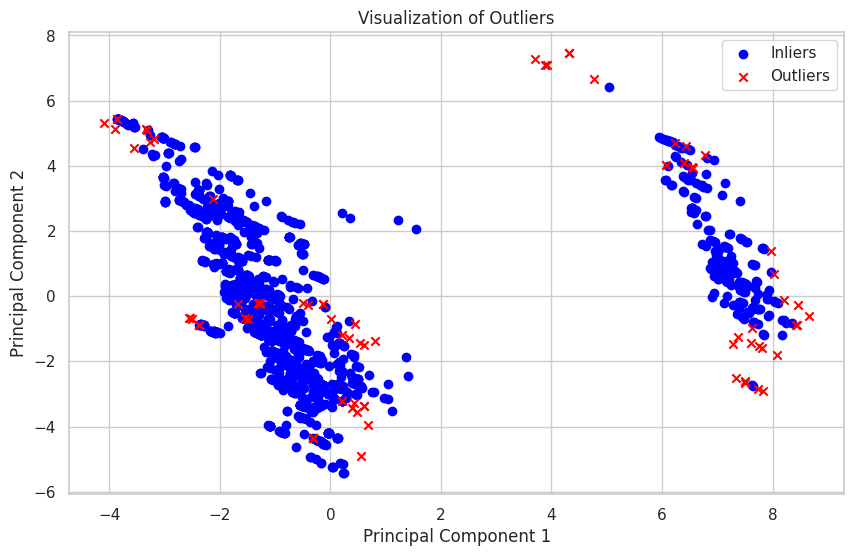

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA, assuming 'Outlier' and any non-numerical columns are not included
X_numerical = df.select_dtypes(include=[np.number]).drop(columns=['Outlier', 'Price per Square ft'])

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Separate inliers and outliers for plotting
inliers = X_pca[df['Outlier'] == 1]
outliers = X_pca[df['Outlier'] == -1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], color='blue', label='Inliers')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', marker='x')

plt.title('Visualization of Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

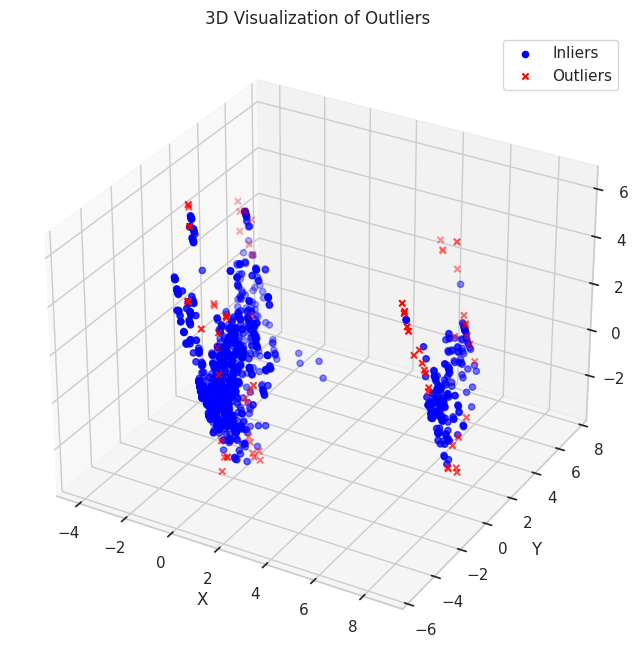

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce to 3 dimensions for visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Separating inliers and outliers for plotting
inliers_3d = X_pca_3d[df['Outlier'] == 1]
outliers_3d = X_pca_3d[df['Outlier'] == -1]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot inliers
ax.scatter(inliers_3d[:, 0], inliers_3d[:, 1], inliers_3d[:, 2], color='blue', label='Inliers')

# Plot outliers
ax.scatter(outliers_3d[:, 0], outliers_3d[:, 1], outliers_3d[:, 2], color='red', label='Outliers', marker='x')

# Title and labels
ax.set_title('3D Visualization of Outliers')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Legend
ax.legend()

# Show the plot
plt.show()


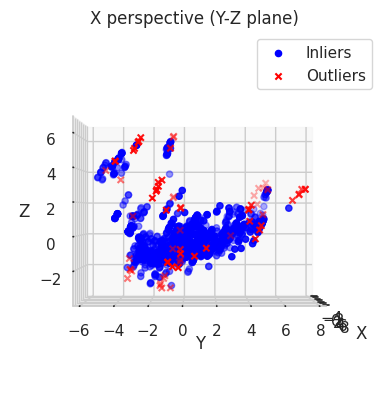

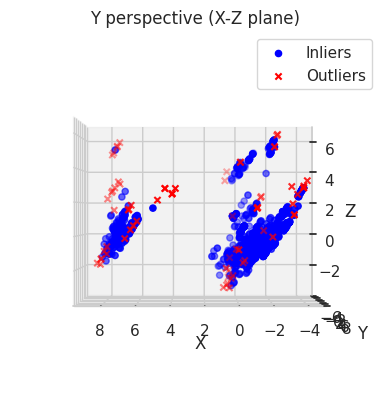

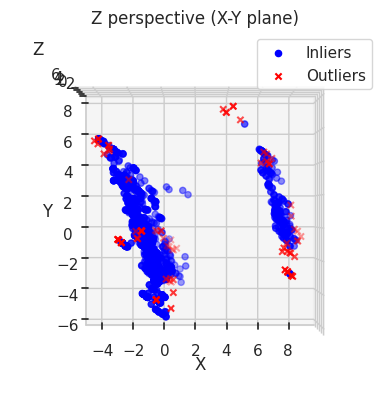

In [ ]:
# Separating inliers and outliers for plotting
inliers_3d = X_pca_3d[df['Outlier'] == 1]
outliers_3d = X_pca_3d[df['Outlier'] == -1]

# Function to create scatter plots from different perspectives
def create_3d_scatter(elev, azim, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(inliers_3d[:, 0], inliers_3d[:, 1], inliers_3d[:, 2], color='blue', label='Inliers')
    ax.scatter(outliers_3d[:, 0], outliers_3d[:, 1], outliers_3d[:, 2], color='red', label='Outliers', marker='x')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.legend()
    plt.show()

# Create the plots
create_3d_scatter(elev=0, azim=0, title='X perspective (Y-Z plane)')
create_3d_scatter(elev=0, azim=90, title='Y perspective (X-Z plane)')
create_3d_scatter(elev=90, azim=-90, title='Z perspective (X-Y plane)')
